In [2]:
pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [praw]2/3 [praw]
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


# Data Collection

In [40]:
import praw
import numpy as np
import pandas as pd

In [275]:
data_cons = []
data_lib = []

In [276]:
reddit = praw.Reddit(client_id="CmAZQ_O3-1Ce5Xwd-DARcQ", client_secret="YA9OyC8gOcM-h74603UPkyBG045aoA", user_agent= "(NLP Classifier by /u/districtlake)")

In [277]:
subreddit_conservative = reddit.subreddit('conservative')
subreddit_liberal = reddit.subreddit('liberal')

In [278]:
posts_1 = subreddit_conservative.top(time_filter='all', limit=8000)
posts_2 = subreddit_liberal.top(time_filter='all', limit=8000)

In [279]:
data_cons = [[post.created_utc, post.title, post.selftext, post.subreddit] for post in posts_1]

In [280]:
data_lib = [[post.created_utc, post.title, post.selftext, post.subreddit] for post in posts_2]

In [281]:
df_cons = pd.DataFrame(data_cons, columns=["created_utc", "title", "selftext", "subreddit"])
df_lib = pd.DataFrame(data_lib, columns=["created_utc", "title", "selftext", "subreddit"])

In [282]:
df_cons.to_csv('cons.csv', index=False)
df_lib.to_csv('lib.csv', index=False)

# Exploratory Data Analysis (EDA) and Data Cleaning

In [283]:
conservative_reddits = pd.read_csv('cons.csv')
liberal_reddits = pd.read_csv('lib.csv')

In [284]:
conservative_reddits

,created_utc,title,selftext,subreddit
0,1.609968e+09,For those of you comparing these protests to B...,NaN,Conservative
1,1.604768e+09,AP Has called the election for Joe Biden,NaN,Conservative
2,1.608664e+09,I want my taxes back,NaN,Conservative
3,1.686575e+09,"Reminder: This picture is illegal in China, wh...",NaN,Conservative
4,1.610491e+09,Fox News: McConnell believes Trump committed i...,NaN,Conservative
...,...,...,...,...
987,1.604972e+09,McConnell: We’ll ‘Have No Lectures’ From Those...,NaN,Conservative
988,1.622501e+09,Chris Pratt honors veterans on Memorial Day in...,NaN,Conservative
989,1.595089e+09,"Charles Barkley is Not Happy About Anti-White,...",NaN,Conservative
990,1.594835e+09,It is not enough,NaN,Conservative


In [285]:
conservative_reddits[conservative_reddits.isnull().any(axis=1)]

,created_utc,title,selftext,subreddit
0,1.609968e+09,For those of you comparing these protests to B...,NaN,Conservative
1,1.604768e+09,AP Has called the election for Joe Biden,NaN,Conservative
2,1.608664e+09,I want my taxes back,NaN,Conservative
3,1.686575e+09,"Reminder: This picture is illegal in China, wh...",NaN,Conservative
4,1.610491e+09,Fox News: McConnell believes Trump committed i...,NaN,Conservative
...,...,...,...,...
987,1.604972e+09,McConnell: We’ll ‘Have No Lectures’ From Those...,NaN,Conservative
988,1.622501e+09,Chris Pratt honors veterans on Memorial Day in...,NaN,Conservative
989,1.595089e+09,"Charles Barkley is Not Happy About Anti-White,...",NaN,Conservative
990,1.594835e+09,It is not enough,NaN,Conservative


In [286]:
conservative_reddits[~conservative_reddits.isnull().any(axis=1)]

,created_utc,title,selftext,subreddit
29,1.604500e+09,"Genuinely, please help me understand","I'm a democrat, and before last night I believ...",Conservative
30,1.737648e+09,Reddit has finally become nearly unusable due ...,sense languid encourage cause crush intelligen...,Conservative
58,1.740009e+09,Explain this to me like I am 5 please,How is this a good thing? How is this a joke? ...,Conservative
59,1.737747e+09,I’m just crying my eyes out. President Trump h...,I’m just crying my eyes out. President Trump h...,Conservative
79,1.740791e+09,Asking to stop at McDonald’s,Courtesy of Daily Wire,Conservative
84,1.753584e+09,If you voted for Donald Trump-- everything hap...,Donald Trump has told us who he is for decades...,Conservative
87,1.738974e+09,Left vs. Right Battle Royale Open Thread,**This is an Open Discussion Thread for all Re...,Conservative
91,1.740362e+09,Why are we firing Forest Service/National Park...,fine support fuel decide provide license shelt...,Conservative
100,1.743513e+09,I regret voting for Donald Trump,APRIL FOOLS!,Conservative
118,1.604518e+09,"In reference to those 133,889 votes that came ...",https://twitter.com/ariehkovler/status/1324020...,Conservative


In [287]:
liberal_reddits[~liberal_reddits.isnull().any(axis=1)]

,created_utc,title,selftext,subreddit
9,1.602463e+09,Long time conservative and Republican. I maile...,I just can not deal with this any more. I’ve l...,Liberal
11,1.738695e+09,If they can hack the fucking United States tre...,The story of the 2024 election will be told so...,Liberal
15,1.741606e+09,No one is fooled by the United States of Ameri...,"Terrible infrastructure, racism, low wages, no...",Liberal
25,1.602171e+09,"The polls are not destiny. If you don't vote, ...",In the midst of multiple news outlets touting ...,Liberal
30,1.739124e+09,Ron Howard sums up this nicely.,"Lori Gallagher nailed this. \n\n*****\n""I'm a ...",Liberal
...,...,...,...,...
963,1.745949e+09,Trump falls for fake news,"I was watching the news this morning, and duri...",Liberal
964,1.726123e+09,"It's insane there are still ""undecided"" voters...",[https://www.youtube.com/watch?v=z67WCP8u7Yk](...,Liberal
986,1.733066e+09,Why do people vote Republican.,"Studies and history shows. The economy, employ...",Liberal
987,1.713656e+09,It’s so infuriating that so many people have j...,How quickly we forgot don’t we ? \nYes things ...,Liberal


Upon first inspection, I was concerned that many of the reddit posts didn't have any self text in them; but it turns out there are still reddits which have self text, they just don't make a majority of them

There seem to be several reddits which have "removed by Reddit" in them. Remove those.

In [288]:
conservative_reddits.drop(conservative_reddits.index[conservative_reddits["title"].str.contains("Removed by Reddit")], inplace=True)

In [289]:
conservative_reddits.index[conservative_reddits["title"].str.contains("Removed by Reddit")]

Index([], dtype='int64')

In [290]:
liberal_reddits.index[liberal_reddits["title"].str.contains("Removed by Reddit")] #already has none

Index([], dtype='int64')

In [291]:
conservative_reddits = conservative_reddits.fillna('')

In [292]:
liberal_reddits = liberal_reddits.fillna('')

# Merging Datasets

In [293]:
classification_liberal = pd.DataFrame([[row["title"]+" " + row["selftext"], 1] for i,row in liberal_reddits.iterrows()], columns=["text", "l"])

In [294]:
classification_liberal

,text,l
0,More GOP politicians have been arrested for se...,1
1,Trump’s pledge to “start winning wars again” i...,1
2,Jared Kushner 'admitted Donald Trump lies to h...,1
3,Chris Murphy: Pence walkout 'a multi million d...,1
4,"Stormy Daniels to Donate $130,000 to Planned P...",1
...,...,...
995,G7 statement scrapped after U.S. insisted coro...,1
996,Harvard Law Professor: ‘More Than Enough Evide...,1
997,Former Republican elector who refused to cast ...,1
998,Democrats parody Melania jacket with shirt tha...,1


In [295]:
classification_conservative = pd.DataFrame([[row["title"]+" " + row["selftext"], 0] for i,row in conservative_reddits.iterrows()], columns=["text", "l"])

In [296]:
classification_conservative

,text,l
0,For those of you comparing these protests to B...,0
1,AP Has called the election for Joe Biden,0
2,I want my taxes back,0
3,"Reminder: This picture is illegal in China, wh...",0
4,Fox News: McConnell believes Trump committed i...,0
...,...,...
986,McConnell: We’ll ‘Have No Lectures’ From Those...,0
987,Chris Pratt honors veterans on Memorial Day in...,0
988,"Charles Barkley is Not Happy About Anti-White,...",0
989,It is not enough,0


In [297]:
classification_dataset = pd.concat([classification_liberal, classification_conservative], ignore_index=True)
classification_dataset

,text,l
0,More GOP politicians have been arrested for se...,1
1,Trump’s pledge to “start winning wars again” i...,1
2,Jared Kushner 'admitted Donald Trump lies to h...,1
3,Chris Murphy: Pence walkout 'a multi million d...,1
4,"Stormy Daniels to Donate $130,000 to Planned P...",1
...,...,...
1986,McConnell: We’ll ‘Have No Lectures’ From Those...,0
1987,Chris Pratt honors veterans on Memorial Day in...,0
1988,"Charles Barkley is Not Happy About Anti-White,...",0
1989,It is not enough,0


# Vectorizer

In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [185]:
vectorizer = TfidfVectorizer(stop_words="english")

In [186]:
transformed = vectorizer.fit_transform(classification_dataset["text"])

In [187]:
df = pd.DataFrame(transformed.toarray())

In [188]:
df[df[849] != 0.0]

,0,1,2,3,4,5,6,7,8,9,...,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120
224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
words = vectorizer.get_feature_names_out()
words

array(['000', '000th', '00s', ..., 'zuckerberg', 'zucman',
       'zvreaggamaeiuohxvg'], dtype=object)

In [190]:
df.columns = words
df

,000,000th,00s,01,02,03,04,040,05,06,...,zelenskyy,zero,zeroing,zings,zip,zoe,zone,zuckerberg,zucman,zvreaggamaeiuohxvg
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.259339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [342]:
# Dropping words that don't really add meaning to the subreddit. Turning this on and off to compare statistics.
words_to_drop = []
for col in df.columns:
    if len(df[df[col] > 0.0]) <= 10 or str(col).isdigit():
        words_to_drop.append(col)
cleaned_df = df.drop(columns=words_to_drop)

In [305]:
cleaned_df

,abuse,access,act,actually,administration,admits,agree,america,american,americans,...,work,workers,world,worse,wrong,www,year,years,yes,york
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.189668,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.223971,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
classification_dataset["l"]

0       1
1       1
2       1
3       1
4       1
       ..
1986    0
1987    0
1988    0
1989    0
1990    0
Name: l, Length: 1991, dtype: int64

In [344]:
dataset = pd.concat([df, classification_dataset["l"]], axis=1)
cleaned_dataset = pd.concat([cleaned_df, classification_dataset["l"]], axis=1)

# Prediction

In [307]:
# Try Logistic Regression First
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

In [349]:
x_train, x_test, y_train, y_test = train_test_split(dataset.drop(columns=["l"]), dataset["l"], stratify=dataset["l"])
x_train_cln, x_test_cln, y_train_cln, y_test_cln = train_test_split(cleaned_dataset.drop(columns=["l"]), cleaned_dataset["l"], stratify=cleaned_dataset["l"])

In [309]:
grd = GridSearchCV(estimator = LogisticRegression(), param_grid={'C':[0.01, 0.1, 1, 10, 100]})

In [374]:
grd.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [375]:
grd.score(x_train, y_train)

0.9979906229068989

In [376]:
grd.score(x_test, y_test)

0.7751004016064257

In the above model, we see a large amount of overfitting present; with training accuracy at 99%, while test accuracy is at 78%. This is a pattern we see with other classifiers, as well

In [313]:
# Other possible classifiers -- Random Forest; K Nearest Neighbor; SVM;

In [314]:
from sklearn.ensemble import RandomForestClassifier

In [315]:
grd_rfc = GridSearchCV(estimator = RandomForestClassifier(), param_grid={'n_estimators':[100, 150, 50], 'min_samples_split':[2, 6, 10, 20, 40], 'ccp_alpha':[0.0, 0.1, 1, 10]})

In [377]:
grd_rfc.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.1, 1, 10],
                         'min_samples_split': [2, 6, 10, 20, 40],
                         'n_estimators': [100, 150, 50]})

In [378]:
grd_rfc.score(x_train, y_train)

0.9792364367046216

In [379]:
grd_rfc.score(x_test, y_test)

0.7590361445783133

In [380]:
# Similar problem: overfitting... To be expected, since Decision Trees traditionally are prone to overfitting.

In [381]:
from sklearn.neighbors import KNeighborsClassifier

In [382]:
grd_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors':[5, 7, 9, 11], 'weights':['uniform', 'distance']})

In [383]:
grd_knn.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [384]:
grd_knn.score(x_train, y_train)

0.49765572672471536

In [385]:
grd_knn.score(x_test, y_test)

0.4979919678714859

In [386]:
# KNN Seems to be HORRIBLE; This algorithm will try to compare "distances" with word frequencies; but both subreddits have very similar word choice and topics used...

In [387]:
from sklearn.svm import SVC

In [388]:
grd_svc = GridSearchCV(estimator=SVC(), param_grid={'C':[0.1, 1.0, 10], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']})

In [389]:
grd_svc.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [390]:
grd_svc.best_params_

{'C': 10, 'kernel': 'rbf'}

In [391]:
grd_svc.score(x_train, y_train)

1.0

In [392]:
grd_svc.score(x_test, y_test)

0.7730923694779116

In [393]:
from sklearn.neural_network import MLPClassifier

In [394]:
mlp = MLPClassifier(max_iter=2000)

In [395]:
mlp.fit(x_train, y_train)

MLPClassifier(max_iter=2000)

In [396]:
mlp.score(x_train, y_train)

1.0

In [397]:
mlp.score(x_test, y_test)

0.7670682730923695

# Comparing Cleaned Dataset vs. Normal Dataset

In [350]:
# Logistic Regression Comparison
grd.fit(x_train, y_train)
log_train = grd.score(x_train, y_train)
log_test = grd.score(x_test, y_test)
grd.fit(x_train_cln, y_train_cln)
log_train_cln = grd.score(x_train_cln, y_train_cln)
log_test_cln = grd.score(x_test_cln, y_test_cln)

# Random Forest Comparison
grd_rfc.fit(x_train, y_train)
rfc_train = grd_rfc.score(x_train, y_train)
rfc_test = grd_rfc.score(x_test, y_test)
grd_rfc.fit(x_train_cln, y_train_cln)
rfc_train_cln = grd_rfc.score(x_train_cln, y_train_cln)
rfc_test_cln = grd_rfc.score(x_test_cln, y_test_cln)

# KNN Comparison
grd_knn.fit(x_train, y_train)
knn_train = grd_knn.score(x_train, y_train)
knn_test = grd_knn.score(x_test, y_test)
grd_knn.fit(x_train_cln, y_train_cln)
knn_train_cln = grd_knn.score(x_train_cln, y_train_cln)
knn_test_cln = grd_knn.score(x_test_cln, y_test_cln)

# Support Vector Classifier Comparison
grd_svc.fit(x_train, y_train)
svc_train = grd_svc.score(x_train, y_train)
svc_test = grd_svc.score(x_test, y_test)
grd_svc.fit(x_train_cln, y_train_cln)
svc_train_cln = grd_svc.score(x_train_cln, y_train_cln)
svc_test_cln = grd_svc.score(x_test_cln, y_test_cln)


NameError: name 'grd_mlp' is not defined

In [352]:

# MultiLayer Perceptron Comparison
mlp.fit(x_train, y_train)
mlp_train = mlp.score(x_train, y_train)
mlp_test = mlp.score(x_test, y_test)
mlp.fit(x_train_cln, y_train_cln)
mlp_train_cln = mlp.score(x_train_cln, y_train_cln)
mlp_test_cln = mlp.score(x_test_cln, y_test_cln)

In [354]:
import matplotlib.pyplot as plt

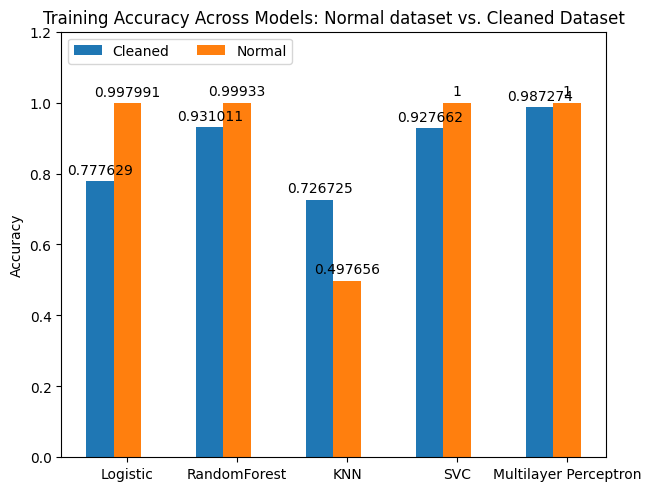

In [367]:
species = ("Logistic", "RandomForest", "KNN", "SVC", "Multilayer Perceptron")
data_train_plot = {
    'Cleaned': (log_train_cln, rfc_train_cln, knn_train_cln, svc_train_cln, mlp_train_cln),
    'Normal': (log_train, rfc_train, knn_train, svc_train, mlp_train)
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data_train_plot.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Training Accuracy Across Models: Normal dataset vs. Cleaned Dataset')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.2)

plt.show()

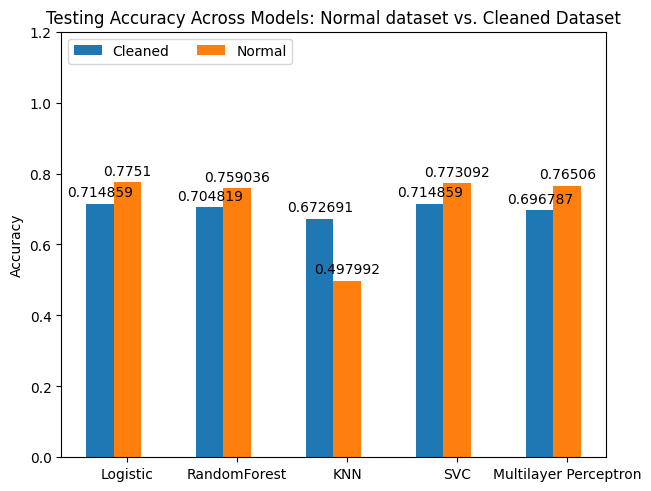

In [369]:
data_test_plot = {
    'Cleaned': (log_test_cln, rfc_test_cln, knn_test_cln, svc_test_cln, mlp_test_cln),
    'Normal': (log_test, rfc_test, knn_test, svc_test, mlp_test)
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data_test_plot.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Testing Accuracy Across Models: Normal dataset vs. Cleaned Dataset')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.2)

plt.show()

From this, we see that the cleaned dataset does worse in every model except for the KNN, in which it does better. That means that the models were finding useless patterns in the numbers and meaningless words. For the KNN, there was never any overfitting present in the normal database; but due to the random "noise" interfering with distances, it suffered from lower accuracy

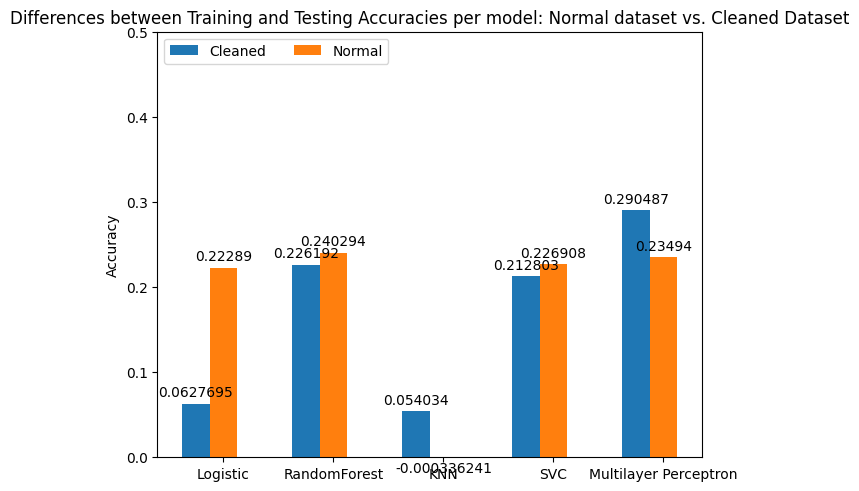

In [373]:
data_diff_plot = {
    'Cleaned': (log_train_cln - log_test_cln, rfc_train_cln - rfc_test_cln, knn_train_cln - knn_test_cln, svc_train_cln - svc_test_cln, mlp_train_cln - mlp_test_cln),
    'Normal': (log_train - log_test, rfc_train - rfc_test, knn_train - knn_test, svc_train - svc_test, mlp_train - mlp_test)
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data_diff_plot.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Differences between Training and Testing Accuracies per model: Normal dataset vs. Cleaned Dataset')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 0.5)

plt.show()

Overall, we also see that in LogisticRegression, cleaning up the database made a huge reduction in variance; However, for the KNN, it seemed to have introduced more variance (due to there being none when it was performing poorly on the normal database)

# Final Classifier

In [412]:
your_message = input("Enter a message to classify as liberal or conservative!")
encoded = vectorizer.transform([your_message])
encoded_df = pd.DataFrame(encoded.toarray(), columns=vectorizer.get_feature_names_out())
print(grd.predict(encoded_df))
print(grd.predict_proba(encoded_df))

Enter a message to classify as liberal or conservative! We must protect our borders from the ravages of other countries making our products, stealing our companies, and destroying our jobs


[0]
[[0.73789484 0.26210516]]
